# Metrics

# Loading libraries

In [2]:
%pip install datasets nltk spacy wordfreq language-tool-python textstat cffi

  Using cached datasets-3.3.2-py3-none-any.whl.metadata (19 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached wordfreq-3.1.1-py3-none-any.whl.metadata (27 kB)
  Using cached language_tool_python-2.9.0-py3-none-any.whl.metadata (54 kB)
  Using cached textstat-0.7.5-py3-none-any.whl.metadata (15 kB)
  Using cached cffi-1.17.1-cp312-cp312-win_amd64.whl.metadata (1.6 kB)
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Us


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/12.8 MB 4.4 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 5.9 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.8 MB 6.8 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 7.1 MB/s eta 0:00:01
     ---------------------------- ----------- 9.2/12.8 MB 7.6 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 7.3 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 7.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 7.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [3]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nickolaus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nickolaus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nickolaus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
from nltk.corpus import wordnet as wn

In [5]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

In [13]:
from collections import Counter

# Loading DS

In [6]:
LANGUAGE = 'en'
LANGUAGE_FULL = 'english'

In [7]:
from datasets import load_dataset, load_from_disk

# dataset = load_dataset('BAAI/Infinity-Instruct', '3M', split='train[:1%]')
dataset = load_from_disk("infinity_instruct")
print(dataset[0])

c:\Users\Nickolaus\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'id': 0, 'conversations': [{'from': 'human', 'value': 'Write a PHP program to flatten a multi-dimensional array, but without using any built-in functions or methods for flattening arrays. Additionally, ensure that the program can handle arrays with a depth of up to 10 levels.'}, {'from': 'gpt', 'value': "Here's a PHP program to flatten a multi-dimensional array without using any built-in functions or methods for flattening arrays:\n\n```php\n<?php\n\nfunction flattenArray($arr) {\n    $result = [];\n    \n    foreach ($arr as $value) {\n        if (is_array($value)) {\n            $nestedArray = flattenArray($value);\n            foreach ($nestedArray as $nestedValue) {\n                $result[] = $nestedValue;\n            }\n        } else {\n            $result[] = $value;\n        }\n    }\n    \n    return $result;\n}\n\n// Test the function\n$multiDimensionalArray = [1, 2, [3, 4, [5, 6, [7, 8, [9, 10]]]]];\n$flattenedArray = flattenArray($multiDimensionalArray);\n\nprint_r($fla

In [2]:
dataset.save_to_disk("infinity_instruct")
print("Saved locally")

Saving the dataset (1/1 shards): 100%|██████████| 34635/34635 [00:00<00:00, 236639.18 examples/s]

Saved locally


# Preprocessing

In [8]:
texts = []
for item in tqdm(dataset, desc="Processing dataset"):
    for conv in item['conversations']:
        if conv['from'] == 'human':
            texts.append(conv['value'])

Processing dataset: 100%|██████████| 34635/34635 [00:04<00:00, 8624.06it/s]


In [9]:
print(len(texts))

51847


In [11]:
texts[0]

'Write a PHP program to flatten a multi-dimensional array, but without using any built-in functions or methods for flattening arrays. Additionally, ensure that the program can handle arrays with a depth of up to 10 levels.'

In [10]:
full_text = "\n".join(texts)

# Computing

In [11]:
metrics_res = {}

## Lexical

### Word-frequency list

In [28]:
from wordfreq import word_frequency

words = full_text.split()
word_counts = Counter(words)

zipf_scores = {word: word_frequency(word, LANGUAGE) for word in word_counts}
print(word_counts.most_common(10))

[('the', 142489), ('to', 68741), ('and', 68372), ('a', 67634), ('of', 67168), ('in', 39507), ('is', 35553), ('for', 27584), ('that', 24544), ('with', 17840)]


In [30]:
from math import log


def compute_difficulty_freq(text):
    words = text.split()
    score = 0
    for word in words:
        word_freq = zipf_scores[word]
        score += 1 / (word_freq if word_freq > 0 else 1e-6)
    return log(score) if score != 0 else 0

metrics_res['word_frequency'] = [compute_difficulty_freq(text) for text in tqdm(texts, desc="Computing difficulty")]

Computing difficulty:   0%|          | 0/51847 [00:00<?, ?it/s]

Computing difficulty: 100%|██████████| 51847/51847 [00:00<00:00, 67703.75it/s]


51847


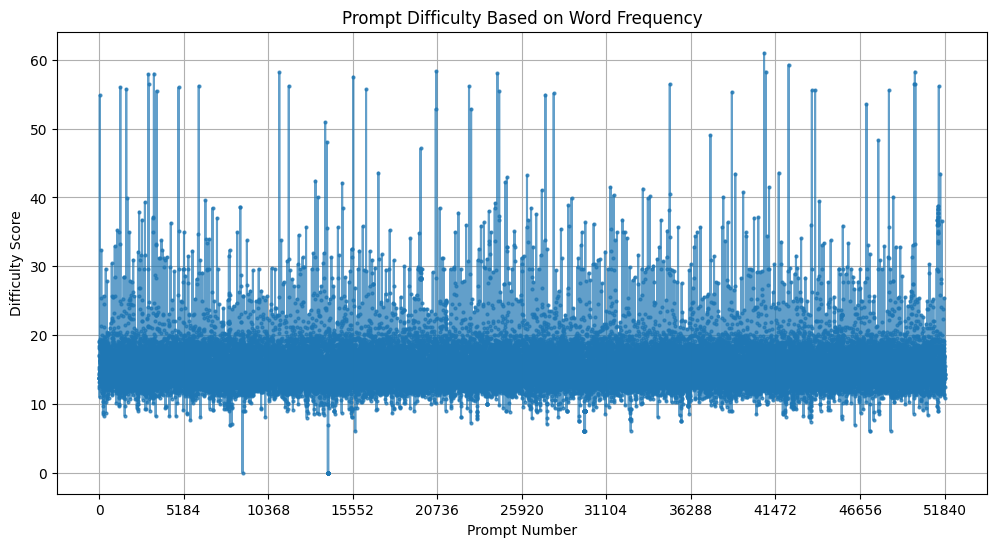

In [32]:
scores = [(index, score) for index, score in enumerate(metrics_res['word_frequency'])]
# indicies, scores = zip(*scores) if scores else ([], [])
print(len(scores))

plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), metrics_res['word_frequency'], marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.xlabel("Prompt Number")
plt.ylabel("Difficulty Score")
plt.title("Prompt Difficulty Based on Word Frequency")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)

plt.show()

In [33]:
def print_most_difficult(scores):
    most_difficult = (sorted(scores, key=lambda x : x[1], reverse=True))[:3]
    for diff in most_difficult:
        print(diff[0], end=" ")
    print()

    for idx, diff in enumerate(most_difficult):
        print("---", idx + 1, "example (", diff[1], "):")
        print(texts[diff[0]])
        print("------\n")

In [34]:
print_most_difficult(scores)

40772 42278 20673 
--- 1 example ( 61.031153663419715 ):
Please focus on the algorithm of this problem and provide code in Haskell:
Given an integer `n` represented as a string, return _the smallest **good base** of_ `n`.

We call `k >= 2` a **good base** of `n`, if all digits of `n` base `k` are `1`'s.

**Example 1:**

**Input:** n =  "13 "
**Output:**  "3 "
**Explanation:** 13 base 3 is 111.

**Example 2:**

**Input:** n =  "4681 "
**Output:**  "8 "
**Explanation:** 4681 base 8 is 11111.

**Example 3:**

**Input:** n =  "1000000000000000000 "
**Output:**  "999999999999999999 "
**Explanation:** 1000000000000000000 base 999999999999999999 is 11.

**Constraints:**

*   `n` is an integer in the range `[3, 1018]`.
*   `n` does not contain any leading zeros.
------

--- 2 example ( 59.308839638887456 ):
##1801##C: Canisal cryptography

problem

Ebi-chan was given the string C obtained by encrypting a non-negative integer D with "canisal cipher". This cipher replaces each number in decimal 

### Identify stop words

In [36]:
from nltk.corpus import stopwords
from math import log

stop_words = set(stopwords.words(LANGUAGE_FULL))

def compute_difficulty_stopwords(text):
    words = text.split()
    score = 0
    for word in words:
        if word.lower() in stop_words:
            continue
        
        word_freq = zipf_scores.get(word, 0)
        score += 1 / (word_freq if word_freq > 0 else 1e-6)
    return log(score) if score != 0 else 0

metrics_res['stopwords'] = [
    compute_difficulty_stopwords(text) for text in tqdm(texts, desc="Computing difficulty (no stop-words)")
]

Computing difficulty (no stop-words):   0%|          | 0/51847 [00:00<?, ?it/s]

Computing difficulty (no stop-words): 100%|██████████| 51847/51847 [00:00<00:00, 55396.76it/s]


Total prompts: 51847


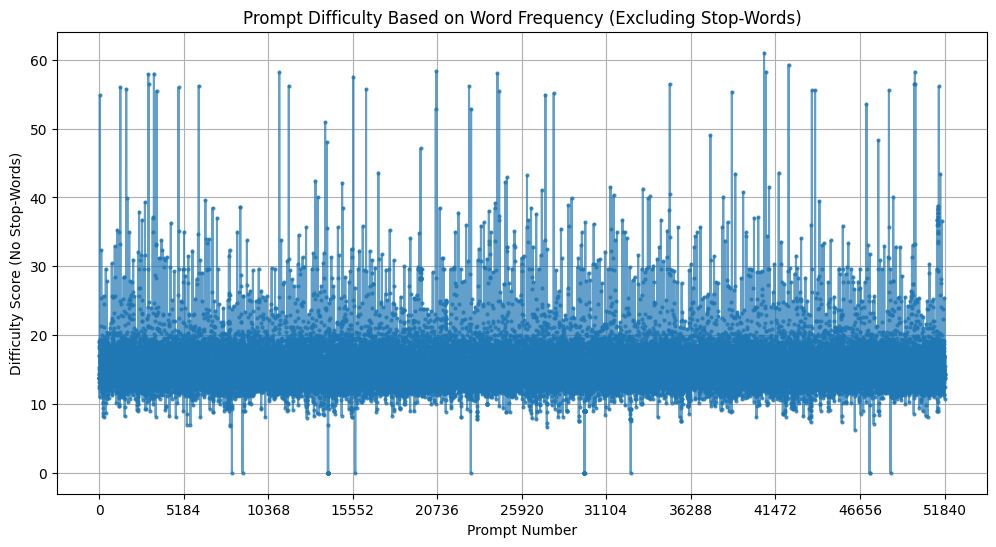

In [37]:
scores = [(index, score) for index, score in enumerate(metrics_res['stopwords'])]
print(f"Total prompts: {len(scores)}")

print_scores = [i[1] for i in scores]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), print_scores, marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.xlabel("Prompt Number")
plt.ylabel("Difficulty Score (No Stop-Words)")
plt.title("Prompt Difficulty Based on Word Frequency (Excluding Stop-Words)")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)
plt.show()

In [38]:
print_most_difficult(scores)

40772 42278 20673 
--- 1 example ( 61.031153663419715 ):
Please focus on the algorithm of this problem and provide code in Haskell:
Given an integer `n` represented as a string, return _the smallest **good base** of_ `n`.

We call `k >= 2` a **good base** of `n`, if all digits of `n` base `k` are `1`'s.

**Example 1:**

**Input:** n =  "13 "
**Output:**  "3 "
**Explanation:** 13 base 3 is 111.

**Example 2:**

**Input:** n =  "4681 "
**Output:**  "8 "
**Explanation:** 4681 base 8 is 11111.

**Example 3:**

**Input:** n =  "1000000000000000000 "
**Output:**  "999999999999999999 "
**Explanation:** 1000000000000000000 base 999999999999999999 is 11.

**Constraints:**

*   `n` is an integer in the range `[3, 1018]`.
*   `n` does not contain any leading zeros.
------

--- 2 example ( 59.308839638887456 ):
##1801##C: Canisal cryptography

problem

Ebi-chan was given the string C obtained by encrypting a non-negative integer D with "canisal cipher". This cipher replaces each number in decimal 

## Syntactic

### Number of clauses

In [48]:
def count_clauses(text):
    doc = nlp(text)
    clause_count = 0
    sentence_count = len(list(doc.sents))
    
    for token in doc:
        if token.dep_ in {"ROOT", "ccomp", "advcl", "acl", "relcl"}:
            clause_count += 1

    return clause_count / sentence_count if sentence_count > 0 else 0


metrics_res['clauses'] = [
    count_clauses(text) for text in tqdm(texts, desc="Computing difficulty (clauses)")
]

Computing difficulty (clauses): 100%|██████████| 51847/51847 [10:33<00:00, 81.88it/s] 


Total prompts: 51847


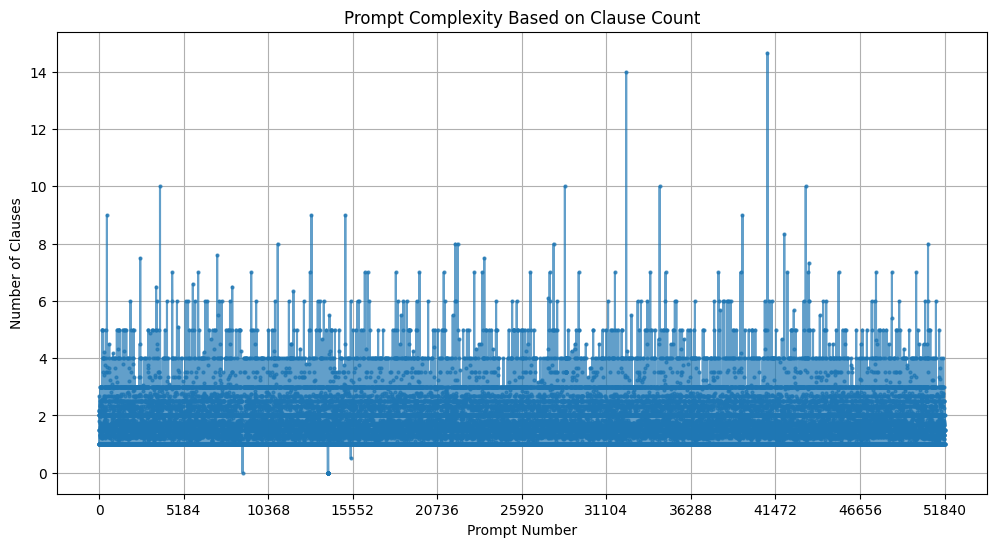

In [49]:
scores = [(index, score) for index, score in enumerate(metrics_res['clauses'])]
print(f"Total prompts: {len(scores)}")

print_scores = [i[1] for i in scores]

plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), print_scores, marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.xlabel("Prompt Number")
plt.ylabel("Number of Clauses")
plt.title("Prompt Complexity Based on Clause Count")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)
plt.show()

In [50]:
print_most_difficult(scores)

40982 32316 3730 
--- 1 example ( 14.666666666666666 ):
Write really overly-funny super hilarious comedy 17+ short Scooby-Doo cartoon parody transcript that always starts with the villain moment first, then the gang hearing about it once they reach the area, and then the rest based on my prompt: (but make it more funnier adult comedy where the gang constantly make fun of and question physics that ain’t possible or don’t make any sense and why, they always mistake some character for a famous person because of their surname being literally the same as a real life celebrity, forcing the character to correct them angrily, Shaggy is often the one who would mishear a location name, leading to someone correcting him angrily and why, Velma is often rudely interrupted by the gang insulting her when she says something too scientifically smart,  they always know that a place they are going to doesn't sound like it exists, they also know something in a place they go to shouldn't even be there as i

### Dependency tree

In [33]:
def compute_tree_depth_for_sent(sent):
    roots = [token for token in sent if token.head == token]
    if not roots:
        return 0
    root = roots[0]
    
    def depth(token):
        if not list(token.children):
            return 1
        return 1 + max(depth(child) for child in token.children)
    
    return depth(root)


def compute_syntactic_complexity(text):
    doc = nlp(text)
    sentence_depths = []
    for sent in doc.sents:
        sent_depth = compute_tree_depth_for_sent(sent)
        sentence_depths.append(sent_depth)
    if sentence_depths:
        return np.mean(sentence_depths)
    return 0


metrics_res['syntactic_complexity'] = [
    compute_syntactic_complexity(text) for text in tqdm(texts, desc="Computing syntactic complexity")
]

Computing syntactic complexity: 100%|██████████| 51847/51847 [11:18<00:00, 76.45it/s] 


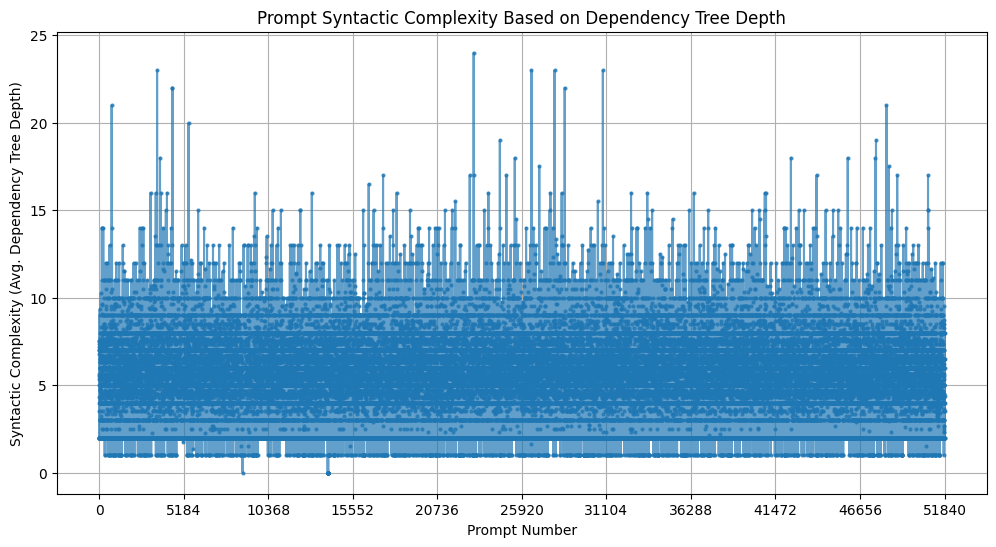

In [34]:
scores = [(index, score) for index, score in enumerate(metrics_res['syntactic_complexity'])]

plt.figure(figsize=(12, 6))
plt.plot(
    range(len(scores)),
    [score for _, score in scores],
    marker='o',
    linestyle='-',
    markersize=2,
    alpha=0.7
)
plt.xlabel("Prompt Number")
plt.ylabel("Syntactic Complexity (Avg. Dependency Tree Depth)")
plt.title("Prompt Syntactic Complexity Based on Dependency Tree Depth")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)
plt.show()

In [35]:
print_most_difficult(scores)

22964 3552 26509 
--- 1 example ( 24.0 ):
Please answer the following question: "Ronald Plasterk", given a list of categories: company, educational institution, artist, athlete, office holder, mean of transportation, building, natural place, village, animal, plant, album, film or written work, what category does the title belong to?
A:
------

--- 2 example ( 23.0 ):
Answer the following question: "Billy Snedden", given a list of categories: company, educational institution, artist, athlete, office holder, mean of transportation, building, natural place, village, animal, plant, album, film or written work, what category does the title belong to?
Answer:
------

--- 3 example ( 23.0 ):
"Obsza", given a list of categories: company, educational institution, artist, athlete, office holder, mean of transportation, building, natural place, village, animal, plant, album, film or written work, what category does the title belong to?
Answer:
------



### Words number and length

In [43]:
metrics_res['words_number'] = [
    len(text) for text in tqdm(texts, desc="Computing words length")
]

Computing words length: 100%|██████████| 51847/51847 [00:00<00:00, 3215229.98it/s]


Total prompts: 51847


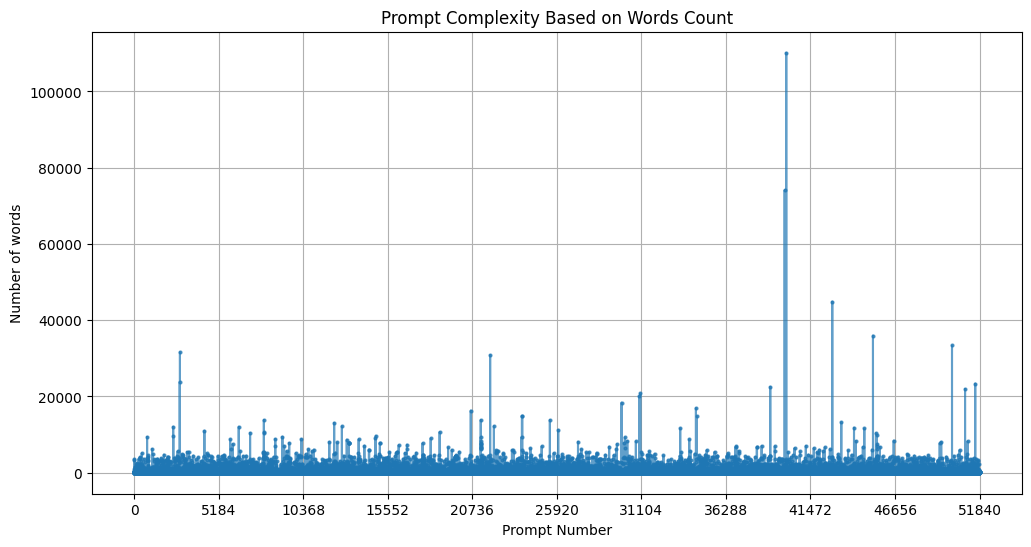

In [44]:
scores = [(index, score) for index, score in enumerate(metrics_res['words_number'])]
print(f"Total prompts: {len(scores)}")

print_scores = [i[1] for i in scores]

plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), print_scores, marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.xlabel("Prompt Number")
plt.ylabel("Number of words")
plt.title("Prompt Complexity Based on Words Count")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)
plt.show()

In [26]:
print_most_difficult(scores)

39988 39889 42809 
--- 1 example ( 110149 ):

then what means luge in deluge?
“Luge” in the context of “deluge” does not have an individual meaning separate from the word “deluge.” “Deluge” is a noun that refers to a severe flood or a heavy downpour of rain, or more generally, any overwhelming quantity of things that come simultaneously or continuously.

The term “luge” by itself refers to a small one- or two-person sled on which one sledges supine (face up) and feet-first. It is also used as the term for the sport of luge, which involves racing these sleds down an ice track.

However, “luge” does not contribute to the meaning of “deluge,” it is merely a coincidence that the word “luge” happens to be present within the word “deluge.” The words have different origins and meanings and are unrelated in usage.
then dig into etymology of this word as well.
The etymology of the word “deluge” traces back to the Latin word “diluvium,” which means “flood” or “inundation.” The Latin term itself 

## Semantic

### Polysemous words 

In [38]:
def count_polysemous_words(text):
    words = text.split()
    total_polysemy = 0
    polysemous_word_count = 0
    
    for word in words:
        senses = wn.synsets(word)
        if len(senses) > 1:
            total_polysemy += len(senses)
            polysemous_word_count += 1

    return total_polysemy / polysemous_word_count if polysemous_word_count > 0 else 0


metrics_res['polysemous'] = [
    count_polysemous_words(text) for text in tqdm(texts, desc="Computing difficulty (polysemous words)")
]

Computing difficulty (polysemous words):   0%|          | 0/51847 [00:00<?, ?it/s]

Computing difficulty (polysemous words): 100%|██████████| 51847/51847 [00:21<00:00, 2429.28it/s]


Total prompts: 51847


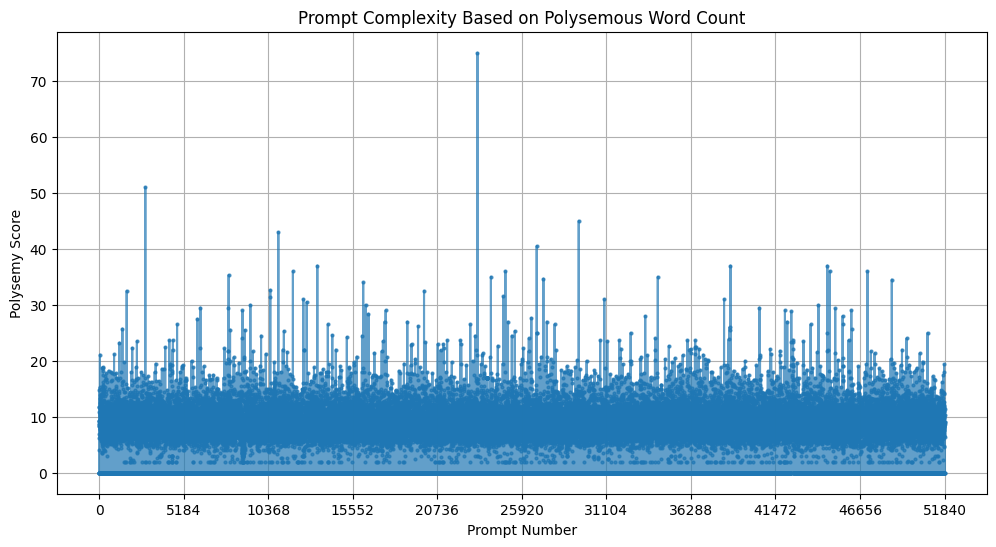

In [39]:
scores = [(index, score) for index, score in enumerate(metrics_res['polysemous'])]
print(f"Total prompts: {len(scores)}")

print_scores = [i[1] for i in scores]

plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), print_scores, marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.xlabel("Prompt Number")
plt.ylabel("Polysemy Score")
plt.title("Prompt Complexity Based on Polysemous Word Count")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)
plt.show()

In [40]:
print_most_difficult(scores)

23197 2830 29407 
--- 1 example ( 75.0 ):
Break that down.
------

--- 2 example ( 51.0 ):
That makes sense.
------

--- 3 example ( 45.0 ):
give another
------



### Contextual ambiguity

In [ ]:
...

## Grammatical correctness

### Checking errors

In [ ]:
tool = language_tool_python.LanguageTool('en-US')

def compute_grammar_errors(text):
    matches = tool.check(text)
    return len(matches)

grammar_errors = [compute_grammar_errors(text) for text in tqdm(texts, desc="Checking grammar errors")]

scores = list(enumerate(grammar_errors))

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(
    [idx for idx, _ in scores],
    [val for _, val in scores],
    marker='o',
    linestyle='-',
    markersize=2,
    alpha=0.7
)
plt.xlabel("Prompt Number")
plt.ylabel("Number of Grammar Errors")
plt.title("Prompt Grammar Errors Detected")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)
plt.show()

In [ ]:
print_most_difficult(scores)

### Part of speech distribution

In [14]:
def normalize_distribution(counter, total_count):
    return {pos: count / total_count for pos, count in counter.items()} if total_count > 0 else {}


def compute_pos_distribution(text):
    doc = nlp(text)
    pos_counts = Counter(token.pos_ for token in doc if token.is_alpha)
    return normalize_distribution(pos_counts, len([token for token in doc if token.is_alpha]))


pos_distr = [compute_pos_distribution(text) for text in tqdm(texts, desc="Computing POS distribution")]

Computing POS distribution: 100%|██████████| 51847/51847 [16:29<00:00, 52.40it/s]  


In [15]:
all_pos_tags = set(tag for dist in pos_distr for tag in dist)
average_distribution = {tag: np.mean([dist.get(tag, 0) for dist in pos_distr]) for tag in all_pos_tags}

In [16]:
def compute_pos_error(dist, avg_dist):
    return sum(abs(dist.get(pos, 0) - avg_dist.get(pos, 0)) for pos in all_pos_tags)


metrics_res['part_of_speech'] = [
    compute_pos_error(dist, average_distribution) for dist in tqdm(pos_distr, "Computing Pos Score")
]

Computing Pos Score: 100%|██████████| 51847/51847 [00:01<00:00, 51197.86it/s]


51847


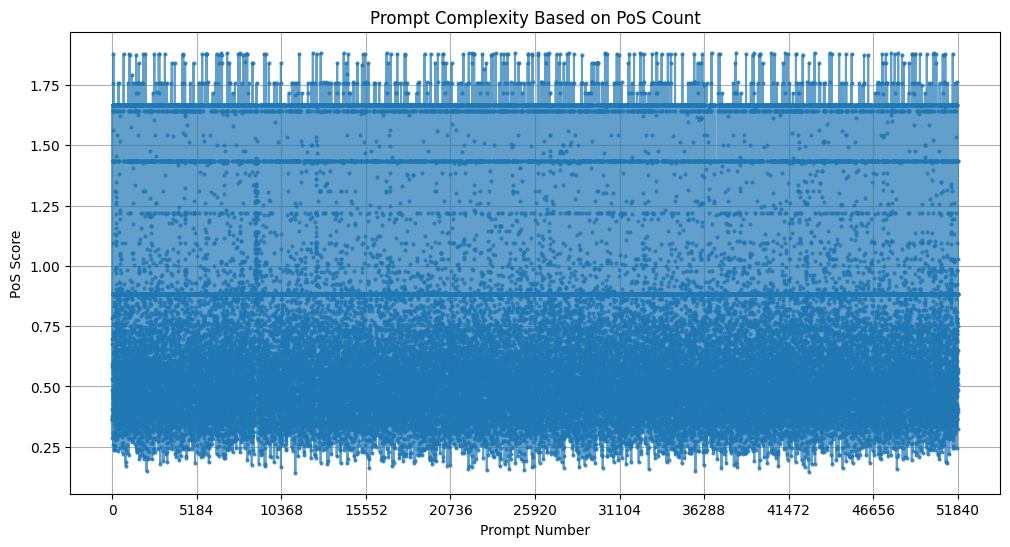

In [20]:
scores = [(index, score) for index, score in enumerate(metrics_res['part_of_speech'])]

print(len(metrics_res['part_of_speech']))

plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), metrics_res['part_of_speech'], marker='o', linestyle='-', markersize=2, alpha=0.7)
plt.xlabel("Prompt Number")
plt.ylabel("PoS Score")
plt.title("Prompt Complexity Based on PoS Count")
plt.xticks(np.arange(0, len(scores), step=max(1, len(scores)//10)))
plt.grid(True)
plt.show()

In [22]:
print_most_difficult(scores)

16818 27985 33369 
--- 1 example ( 1.8841142369769077 ):
在一个10 x 10的正方形中，从左上角走到右下角，每次只能向右或向下走一步，有多少条不同的路径？
------

--- 2 example ( 1.8841142369769077 ):
生成一个10 x 10的数独谜题。
------

--- 3 example ( 1.8841142369769077 ):
给我推荐一下最近热门的电影吧。
------



## Readability score

### Flesch-Kincaid score

In [ ]:
...

### Gunning Fog Index

In [ ]:
...

### Dale-Chall Readability Score

In [ ]:
...